In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loading image

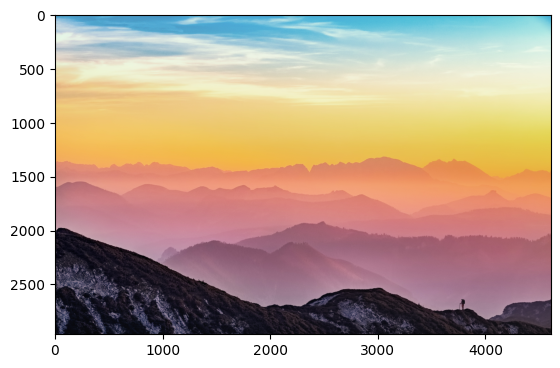

In [2]:
image_dir = "pexels-simon-berger-1323550.jpg"
img = plt.imread(image_dir)
plt.imshow(img)

# Let's See histogram of indiviual RGB color

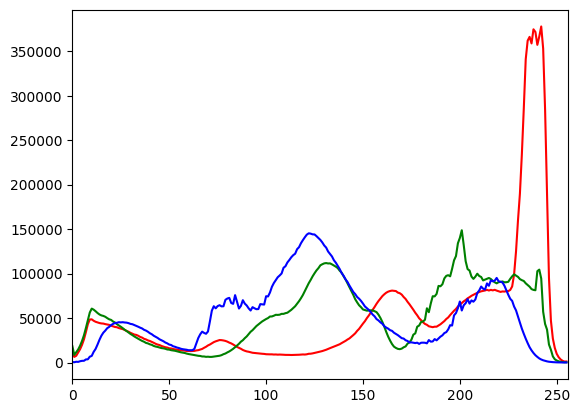

In [3]:
color = ('r','g','b')
for i,col in enumerate(color):
    hist, bins = np.histogram(img[:,:,i],bins=256,range =(0,256))
    plt.plot(bins[:-1],hist,color = col)
    plt.xlim([0,256])
plt.show()

# Converting RGB into Grayscale

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.299,0.587,0.144])

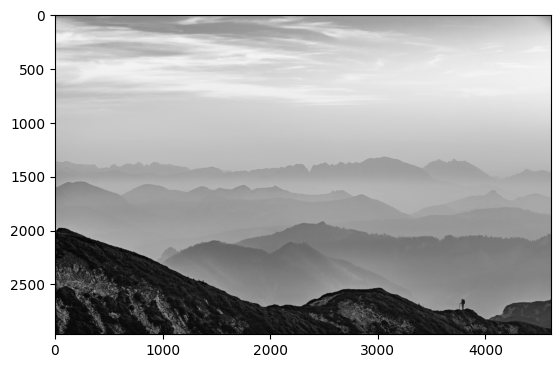

In [5]:
gray = rgb2gray(img)
plt.imshow(gray,cmap='gray')

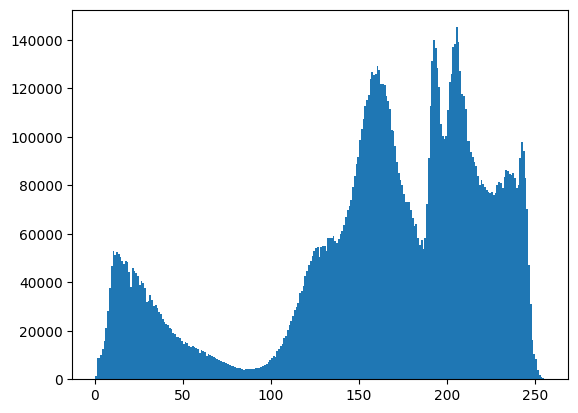

In [6]:
hist,bins = np.histogram(gray.ravel(),256,[0,256])
plt.hist(gray.ravel(),256,[0,256])
plt.show()

### Conveting RGB to grayscale via above method create to two problem which need to address.
1. Some pixel values are more than 256.(which is out of range 0 to 256) 
    - Hence all those values need to put in range.
2. Pixel values are not integer hence need to convert them to integer.
    - Here we are using floor method.

In [7]:
max(gray.ravel())

260.169

In [8]:
gray.ravel()[10:20]

array([127.247, 128.277, 135.487, 141.667, 133.427, 131.367, 130.049,
       140.349, 137.259, 134.169])

In [9]:
fimg = list(np.floor(gray.ravel()))
fimg[10:20]

[127.0, 128.0, 135.0, 141.0, 133.0, 131.0, 130.0, 140.0, 137.0, 134.0]

In [10]:
gray.shape

(2963, 4608)

### How are we going to implement histogram equalization?
1. Here we have image 'gray' with 2963x4608 pixels in total;
    Imax be the maximum image intensity value. which is 255
    histogram_array ne the image histogram

2. First histogram_array is normalized by dividing it with num_pixels then Integrate histogram_array to obtain the cumulative distribution chistogram_array.

3. Create transformed map by multiplying max intensity value i.e. 255 with chistogram_array.

4. with the transformed mapping we can get histogram equalized image.


In [10]:
#flatten image array and calculate histogram via binning
histogram_array,bins = np.histogram(gray.ravel(),256,[0,256])
#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels
# plt.plot(histogram_array)
chistogram_array = np.cumsum(histogram_array)
# plt.plot(chistogram_array)
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
# img_list =list(gray.ravel())
fimg = list(np.floor(gray.ravel()))
# print(transform_map)
two8 = list(i for i in range(256))
itxn = {i:transform_map[i] for i in two8}
itxn[256],itxn[257],itxn[258],itxn[259],itxn[260] = 254,254,254,254,254
eq_img_list = [itxn[p] for p in fimg]
eq_gray = np.reshape(np.asarray(eq_img_list), gray.shape)



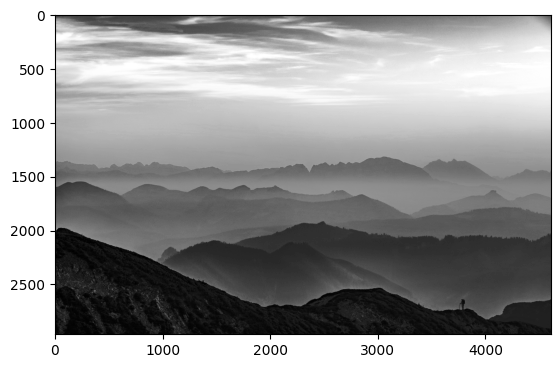

In [11]:
plt.imshow(eq_gray,cmap='gray')

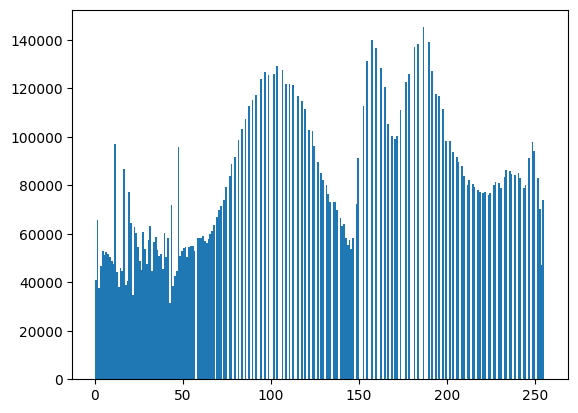

In [12]:
plt.hist(eq_gray.ravel(),256,[0,256])
plt.show()